In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 
CHANNELS = 3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
) 




Found 2152 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names # get the class names
class_names # Folder names are the class names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Vegetable-model-']

In [5]:
len(dataset) 

68

In [6]:
68*32 # The last batch is not perfect so it is showing more than 32.

2176

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

    

(256, 256, 3)


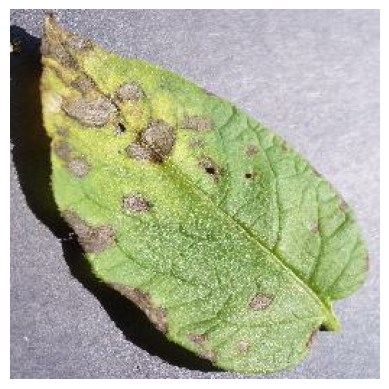

In [8]:
for image_batch,label_batch in dataset.take(1): # take(1) takes the first batch
    plt.imshow(image_batch[0].numpy().astype('uint8')) # imshow takes only uint8
    # image_batch[0] means the first image in the batch
    # imshow is used to display the image
    # full form of imshow is image show
    plt.axis("off")

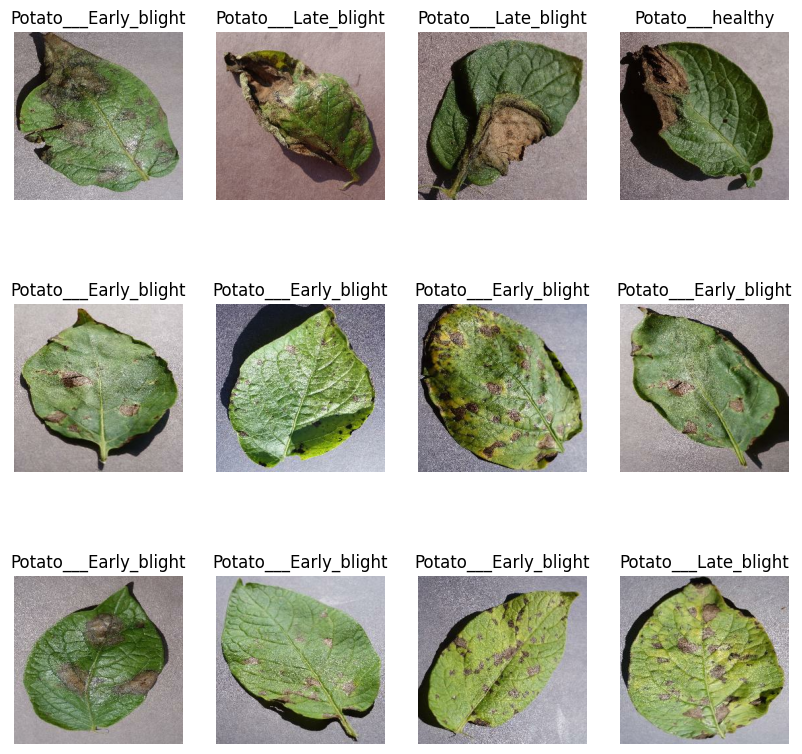

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, latch_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1) # 3 rows and 4 columns
        # i+1 is the position of the image
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
# 80% ==> training
# 20% ==> 10% validation, 10% testing
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54) # first 54 batches. Each batch contains 32 samples
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54) # skip first 54 batches.
len(test_ds)

14

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6) # take first 6 batches
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)


8

In [16]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000): 
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split* ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(val_size)
    test_ds = test_ds.take(val_size)
    return train_ds,val_ds,test_ds




In [17]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

8

In [20]:
len(test_ds)

6

In [21]:
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.prefetch(buffer_size= tf.data.AUTOTUNE)
# AUTOTUNE is used to automatically set the buffer size
# AUTOTUNE is a special value that will cause the system to tune the value dynamically at runtime.
# It is used to optimize the performance of the input pipeline.
# It is used to automatically set the buffer size

In [22]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), # flip the image horizontally and vertically 
    layers.experimental.preprocessing.RandomRotation(0.2),# rotate the image by 0.2 
])
# resize and rescale are the layers of the neural network

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes = 3
model = models.Sequential([ # Sequential model is used to create a linear stack of layers
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape), # 32 filters, 3x3 kernel size
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape), 
    layers.MaxPooling2D((2,2)), # 2x2 pool size
    layers.Flatten(),
    layers.Dense(64,activation='relu'), # 64 neurons # relu is used to remove the negative values
    layers.Dense(n_classes,activation='softmax') # 3 neurons # softmax is used to get the probability of each class
])
model.build(input_shape=input_shape) # build the model


In [25]:
model.summary() # summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # from_logits=False because the output of the model is not probabilities
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    batch_size=BATCH_SIZE,
    verbose= 1 # verbose=1 is used to display the progress bar
)

Epoch 1/50


54/54 [==============================] - 101s 2s/step - loss: 0.9154 - accuracy: 0.4913 - val_loss: 0.8489 - val_accuracy: 0.5273
Epoch 2/50
54/54 [==============================] - 107s 2s/step - loss: 0.7220 - accuracy: 0.7066 - val_loss: 0.4642 - val_accuracy: 0.8242
Epoch 3/50
54/54 [==============================] - 103s 2s/step - loss: 0.4951 - accuracy: 0.7801 - val_loss: 0.3610 - val_accuracy: 0.8711
Epoch 4/50
54/54 [==============================] - 167s 3s/step - loss: 0.3359 - accuracy: 0.8675 - val_loss: 0.2643 - val_accuracy: 0.8984
Epoch 5/50
54/54 [==============================] - 157s 3s/step - loss: 0.2729 - accuracy: 0.8831 - val_loss: 0.2780 - val_accuracy: 0.8984
Epoch 6/50
54/54 [==============================] - 113s 2s/step - loss: 0.2409 - accuracy: 0.9005 - val_loss: 0.3634 - val_accuracy: 0.8789
Epoch 7/50
54/54 [==============================] - 195s 4s/step - loss: 0.2523 - accuracy: 0.9010 - val_loss: 0.1933 - val_accuracy: 0.9297
Epoch 8/50
54/54 [======

In [28]:
scores = model.evaluate(test_ds) # evaluate the model
scores

6/6 [==============================] - 3s 271ms/step - loss: 0.0478 - accuracy: 0.9740


[0.04776877537369728, 0.9739583134651184]

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()  # history.history contains the loss, accuracy, validation loss and validation accuracy
# Validation loss is the loss on the validation set
# Validation accuracy is the accuracy on the validation set

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
acc = history.history['accuracy'] # accuracy on the training set
val_acc = history.history['val_accuracy'] # accuracy on the validation set
loss = history.history['loss'] # loss on the training set
val_loss = history.history['val_loss'] # loss on the validation set

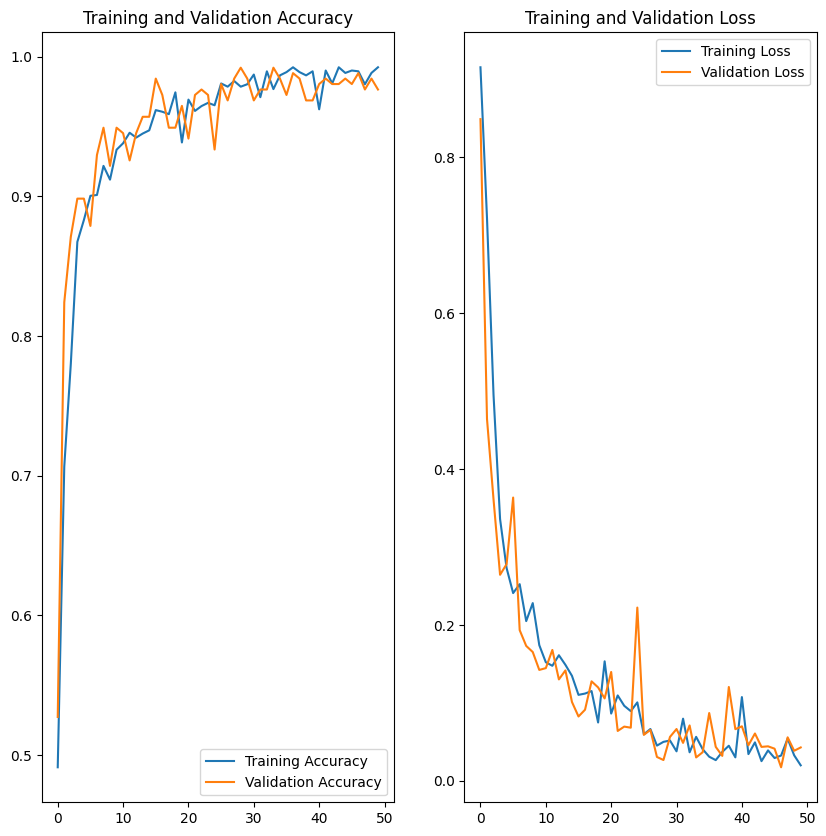

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 1s 513ms/step
predicted label: Potato___Early_blight


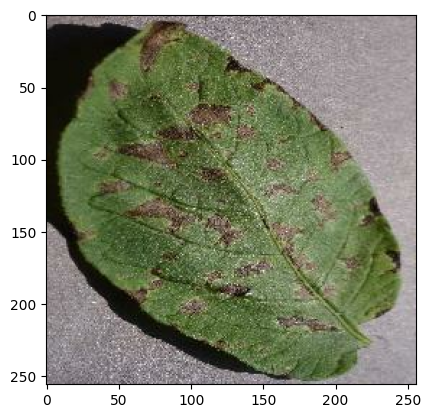

In [33]:
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


## Write a function for inference

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


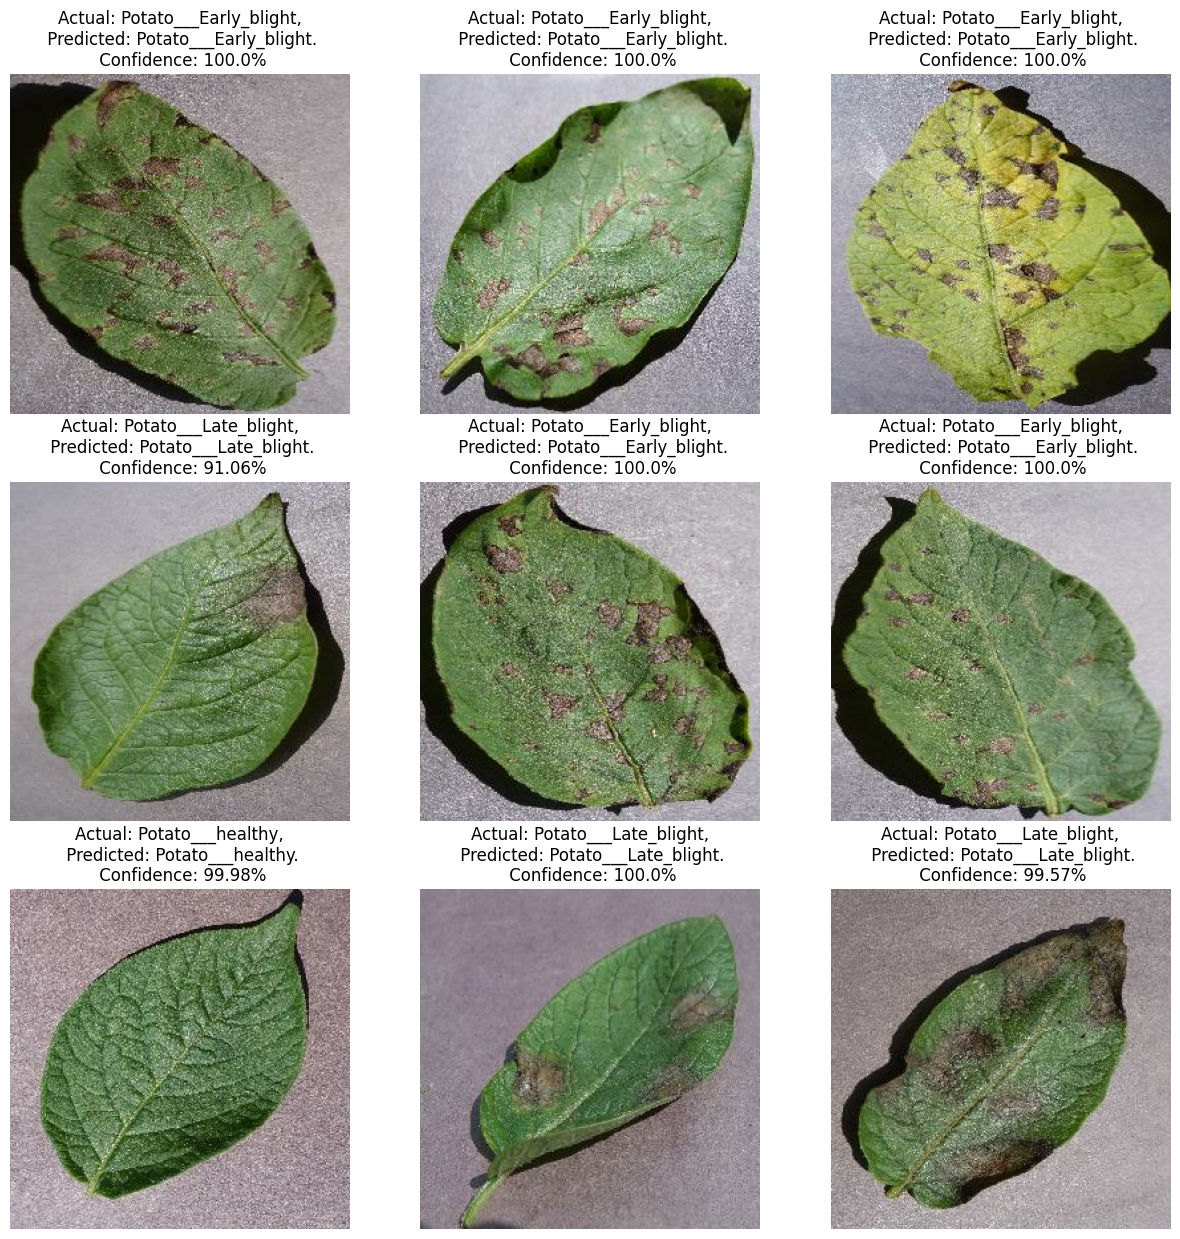

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [36]:
model_version = 1
model.save(f"D:/ujjwal work/sem-6/Deep Learning/models/{model_version}")

INFO:tensorflow:Assets written to: D:/ujjwal work/sem-6/Deep Learning/models/1\assets


INFO:tensorflow:Assets written to: D:/ujjwal work/sem-6/Deep Learning/models/1\assets


In [37]:
saved_model = tf.keras.models.load_model(f"D:/ujjwal work/sem-6/Deep Learning/models/{model_version}")
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

# Keras
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 
Being able to go from idea to result with the least possible delay is key to doing good research.
The core data structure of Keras is a model, a way to organize layers.
The main type of model is the Sequential model, a linear stack of layers.

## What is Conv2d?
Conv2d is a function that performs a 2D convolution on the input tensor. <br>
It is a process of extracting features from the input image.<br>
It uses a filter or kernel to convolve the input image. <br>
The kernel is a matrix of weights.<br>
The kernel is applied to the input tensor to produce a feature map.<br>
The feature map is a matrix of values.<br>
The feature map is a representation of the input image.

<b>Parameters are</b>

1. filters: This is the number of output filters in the convolution, or in other words, the number of feature maps to create. It's an integer.

2. kernel_size: This is the height and width of the 2D convolution window. It can be a single integer to specify the same value for all spatial dimensions, or a tuple or list of 2 integers specifying the height and width.

3. strides: This is the stride of the convolution along the height and width. It can also be a single integer or a tuple or list of 2 integers. The default is (1, 1).

4. padding: This can be either 'valid' or 'same'. If 'valid', no padding is applied. If 'same', padding is applied so that the input height and width are preserved in the output. The default is 'valid'.

5. activation: This is the activation function to use. If you don't specify anything, no activation is applied. You can pass a string (like 'relu', 'sigmoid', 'tanh', etc.), an existing function from tf.keras.activations, or a custom function.

6. use_bias: A boolean, whether the layer uses a bias vector. Default is True.

7. kernel_initializer and bias_initializer: Initializers for the kernel weights and bias. Default is 'glorot_uniform' and 'zeros' respectively.

8. kernel_regularizer and bias_regularizer: Regularizers for the kernel weights and bias. Default is None.



# What is preprocessing here? 
1. Resizing the image
2. Normalizing the pixel values
3. Shuffling the images
4. Splitting the data into training and validation sets
5. Caching the data to improve the data loading speed
6. Prefetching the data to improve the data loading speed
7. Augmenting the data to improve the model’s ability to generalize

# Batch Size
1. The batch size is a hyperparameter that defines the number of samples to work 
2. through before updating the internal model parameters.
3. The batch size defines the number of samples that will be propagated through the network.
4. For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100.
5. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network.
6. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again.
7. We can keep doing this procedure until we have propagated all samples through of the network.

# What is image_dataset_from_directory? 
It is a function that reads images from a directory and creates a dataset from them.
This function is very useful for training models on a large dataset of images.
The function takes in the following arguments:
1. directory: The directory where the images are stored.
2. labels: The labels for the images. This can be a list of strings or a list of integers.
3. image_size: The size of the images. This is a tuple of two integers: (height, width).
4. batch_size: The batch size for the dataset. This is an integer.
5. shuffle: Whether to shuffle the dataset. This is a boolean.
6. seed: The seed for the random number generator. This is an integer.
7. validation_split: The fraction of the dataset to use for validation. This is a float between 0 and 1.
8. subset: The subset of the dataset to use. This is a string: "training" or "validation".
9. interpolation: The interpolation method to use when resizing the images. This is a string: "bilinear", "nearest", or "bicubic".

This function automatically detects class labels based on the directory structure. If your data is organized like this:

<p>main_directory/<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspclass_a/&nbsp&nbsp<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspa_image_1.jpg<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspa_image_2.jpg<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspclass_b/<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspb_image_1.jpg<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbspb_image_2.jpg</p>

Calling image_dataset_from_directory(main_directory, labels='inferred') will yield batches of images from the subdirectories class_a and class_b, along with labels 0 and 1 (0 corresponds to class_a, and 1 corresponds to class_b)

# result of dataset is a tuple of (image, label)
1. image is a tensor of shape (32, 256, 256, 3)
2. label is a tensor of shape (32,)
3. 32 is the batch size
4. 256 is the image size
5. 3 is the color channel
6. label is the index of the class

## What is tf.keras.Sequential?
It is a linear stack of layers.<br>
It is used to create a model layer by layer.<br>
It is used to create a model by passing a list of layers.<br>
## what are layers here?
Layers are the basic building blocks of neural networks in Keras.<br>
Layers are used to create a neural network.<br>
Layers are used to create a model by passing a list of layers to the tf.keras.Sequential.<br>



## What is data Augmentation?

Data augmentation is a technique of artificially increasing the training the training set by creating modified copies of a
dataset. It includes making minor changes to the dataset or using deep learning to generate new data points 

## When to use data Augumentation?
1. To prevent models from overfitting.
2. The initial training set is too small.
3. To improve the model accuracy.
4. To Reduce the operational cost of labeling and cleaning the raw dataset.
## Image Augmentation
1. <b>Geometric transformations</b>: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance.
2. <b>Color space transformations</b>: randomly change RGB color channels, contrast, and brightness.
3. <b>Kernel filters</b>: randomly change the sharpness or blurring of the image. 
4. <b>Random erasing</b>: delete some part of the initial image.
5. <b>Mixing images</b>: blending and mixing multiple images.  

## Use Keras Preprocessing Layers
#### Resizing and Rescaling
You can use the Keras preprocessing layers to resize your images to a consistent shape(with <b>tf.keras.layers.Resizing</b>), and to rescale pixel values (with <b>tf.keras.layers.Rescaling</b>).
<pre>
IMG_SIZE = 100
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE)
    layers.Rescaling(1./255)
])
result = resize_and_rescale(image)
_ = plt.imshow(result)</pre>

## Data augumentation
You can use the Keras preprocessing layers for data augmentation as well, such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation.
<pre>
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ])
</pre>

## Deep Learnign Models
Deep learning models are artificial neural networks that can learn from large amounts of data and perform various tasks, such as image recognition, natural language processing, speech recognition, and more. 🧠

To create and use a deep learning model, you need to follow some steps, such as building, compiling, fitting, evaluating, predicting, saving, and loading. These steps may vary depending on the framework and the type of model you are using. 🛠

For example, if you are using TensorFlow, a popular framework for deep learning, you can use the following steps to create and use a deep learning model:

1. <b>Building:</b> You can use the tf.keras.Sequential class to create a model by stacking layers of neurons. You can also use the tf.keras.Model class to create a custom model with more flexibility. You can use various types of layers, such as tf.keras.layers.Dense, tf.keras.layers.Conv2D, tf.keras.layers.LSTM, and more. You can also specify the input shape and the output units of your model. 🏗
2. <b>Compiling</b>: You can use the compile method of your model to specify the optimizer, the loss function, and the metrics that you want to use to train and evaluate your model. For example, you can use tf.keras.optimizers.Adam, tf.keras.losses.MeanSquaredError, and tf.keras.metrics.Accuracy. ⚙

3. <b>Fitting</b>: You can use the fit method of your model to train it on your training data. You can also specify the number of epochs, the batch size, the validation data, and the callbacks that you want to use during the training process. For example, you can use tf.keras.callbacks.EarlyStopping to stop the training when the validation loss stops improving. 🏋
Evaluating: You can use the evaluate method of your model to test its performance on your test data. You can also use the predict method of your model to generate predictions on new data. You can compare the actual and predicted values to measure the accuracy of your model. 📊
4. <b>Saving and loading</b>: You can use the save and load_model methods of the tf.keras.models module to save and load your model. You can save your model as a single file or as a folder containing the weights and the architecture of your model. You can also use the save_weights and load_weights methods of your model to save and load only the weights of your model. 💾
# deep learning model is first built then compiled then fitted then evaluated
1. model is built using the build function
2. model is compiled using the compile function
3. model is fitted using the fit function
4. model is evaluated using the evaluate function
5. model is used to predict using the predict function
6. model is used to save using the save function
7. model is used to load using the load function
8. model is used to train using the train function
9. model is used to test using the test function
10. model is used to validate using the validate function
11. model is used to predict using the predict function